CONTINUEMOS...

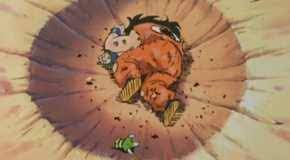

ALGORITMO NAVE BAYES.

In [ ]:
"""
El algoritmo Naive Bayes (o Bayes Ingenuo) es un método de aprendizaje
supervisado que se utiliza principalmente para tareas de clasificación.
Es un algoritmo simple pero potente,
basado en el Teorema de Bayes y una suposición clave de independencia
entre las variables predictoras.
"""

# VENTAJAS

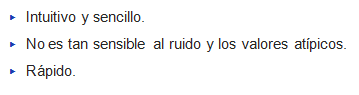

# DESVENTAJAS

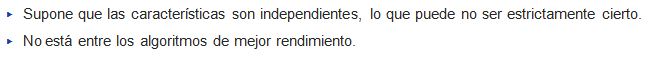

RECORDANDO RAPIDAMENTE LO QUE ES EL TEOREMA DE BAYES

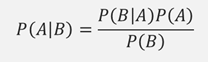

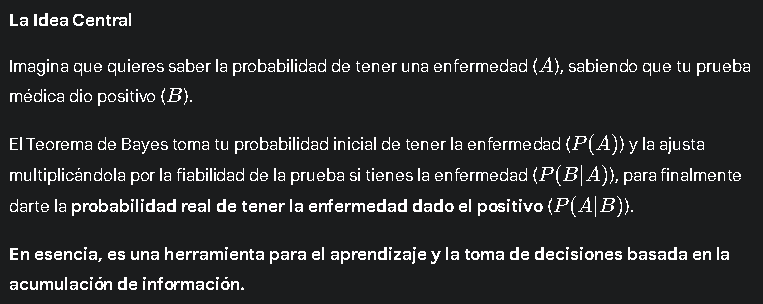

RECORDANDO QUE...

In [ ]:
"""
P(A∣B) significa la Probabilidad Condicional.
"""

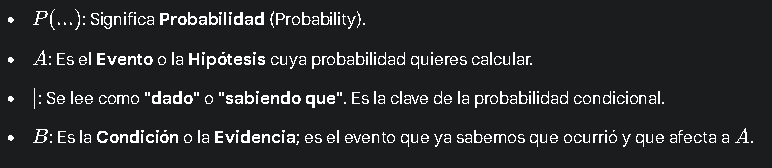

Y TENEMOS QUE.

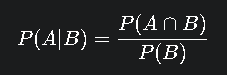

# VOLVIENDO A LO QUE NECESITABAMOS

In [ ]:
"""
dentro de nuestro algoritmo nave bayes vamos a tener las siguientes
representaciones
"""

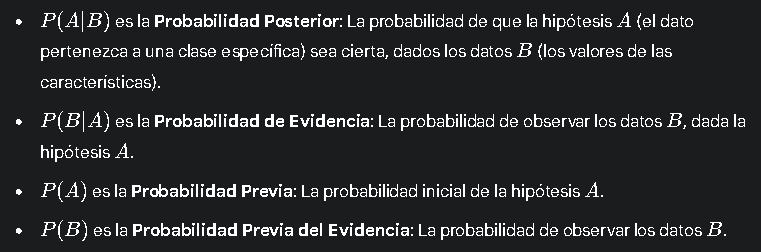

In [ ]:
"""
lo podemos ver tambien de esta forma
"""

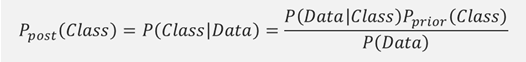

VAMOS A EXPLICAR EXPLICITAMENTE EL ALGORITMO

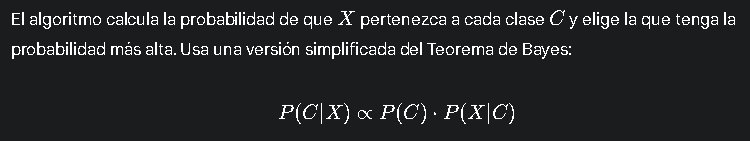

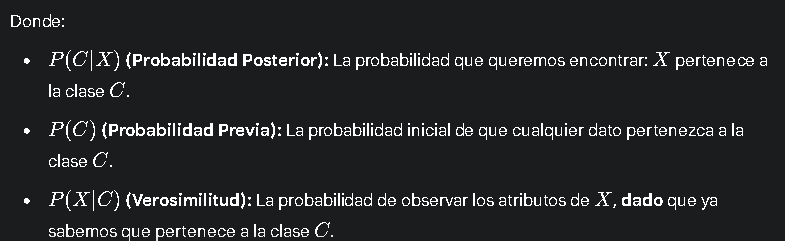

In [ ]:
"""
El punto X tiene múltiples características o atributos (ej. x1​,x2​,x3​,…,xn​).
La suposición "ingenua" permite descomponer la Verosimilitud (P(X∣C))
en el producto de las probabilidades de cada característica
asumiendo que son independientes entre sí:
"""

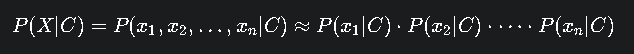

CALCULO DE LA CLASE PREDICHA C

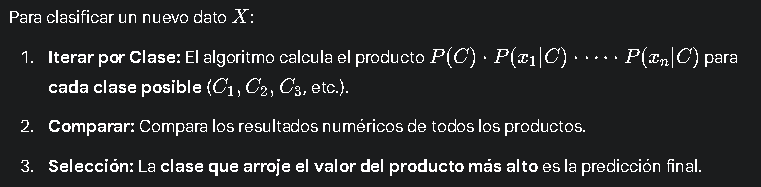

COMO CALCULAMOS P(C)

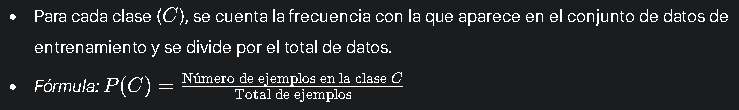

COMO CALCULAMOS P(x_i​∣C)

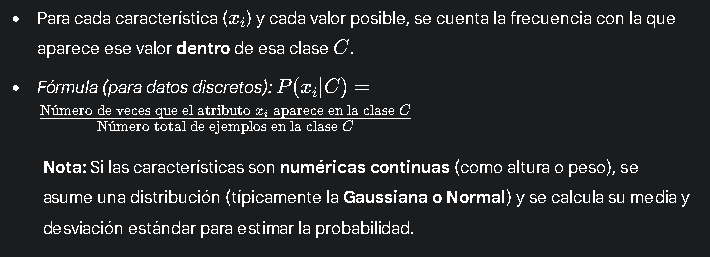

In [ ]:
""" YO LES DOY EL EJEMPLO, CONFIEN EN EL PROCESO """

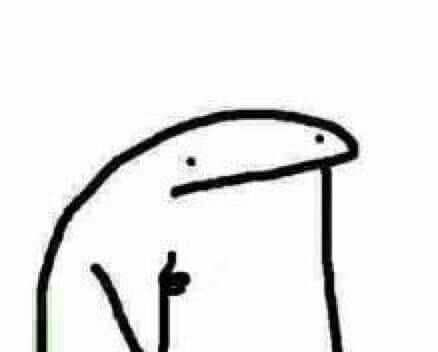

ALGORITMO KNN

In [ ]:
"""
El algoritmo k-Nearest Neighbors (k-NN), o k-Vecinos Más Cercanos,
es un método simple, no paramétrico y de aprendizaje supervisado
que se utiliza tanto para clasificación como para regresión.
Es considerado un algoritmo de "aprendizaje perezoso" (lazy learning)
porque no aprende un modelo discriminativo generalizado a partir de
los datos de entrenamiento;
en su lugar, simplemente memoriza el conjunto de datos de entrenamiento.
"""

In [ ]:
"""
El principio fundamental de k-NN es que los puntos de datos que están
cerca el uno del otro en el espacio de características (features) son similares.
"""

Sin título.png

EMPECEMOS A EXPLICARLO

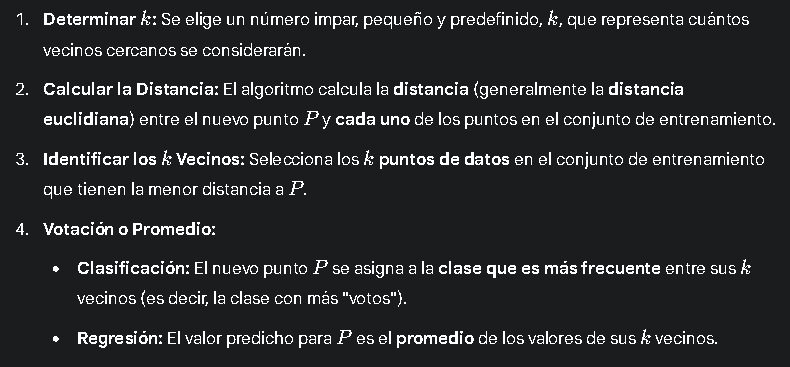

ES BIEN IMPORTANTE

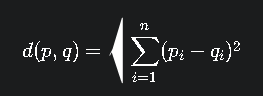

EJEMPLO DE CODIGO

El punto nuevo ([0.5 4.5]) se clasifica como: Clase 0 (con K=5)
Votos de los 5 vecinos: 
0    4
1    1
Name: count, dtype: int64


/tmp/ipython-input-2860152107.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3) # 3 colores distintos para 3 clases


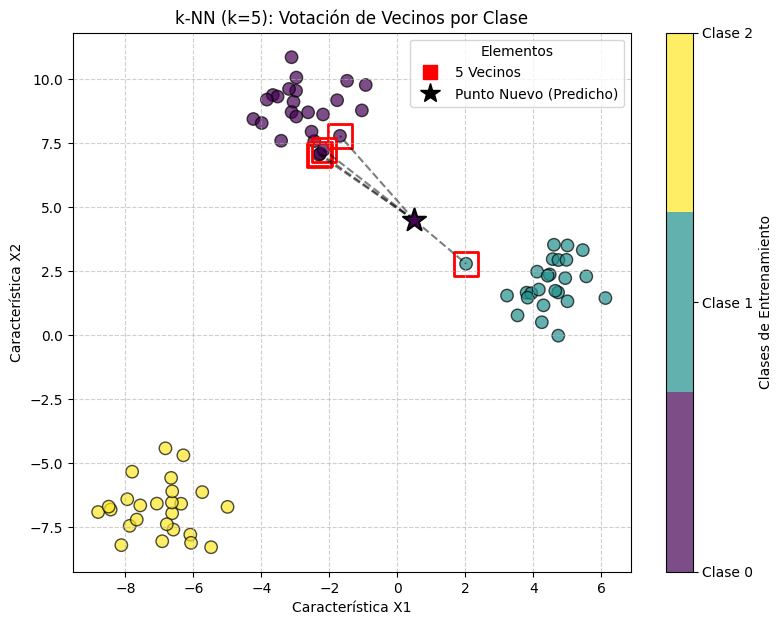

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# --- 1. Generar y preparar datos de entrenamiento simples ---
# Creamos datos con 3 clases (0, 1, 2) para mejor visualización
X, y = make_blobs(n_samples=75, centers=3, random_state=42, cluster_std=1.0)
X = pd.DataFrame(X, columns=['X1', 'X2'])
y = pd.Series(y)

# Definir el nuevo punto que queremos clasificar (la estrella)
new_point = pd.DataFrame([[0.5, 4.5]], columns=['X1', 'X2'])

# Escalar los datos (importante para k-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
new_point_scaled = scaler.transform(new_point)

# --- 2. Entrenar el modelo k-NN (k=3) ---
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_scaled, y)

# --- 3. Clasificar el nuevo punto y obtener vecinos ---
prediction = knn.predict(new_point_scaled)[0]

# Obtener los índices de los K vecinos más cercanos
distances, indices = knn.kneighbors(new_point_scaled)
nearest_neighbors_indices = indices[0]
nearest_neighbors = X.iloc[nearest_neighbors_indices]
nearest_neighbors_classes = y.iloc[nearest_neighbors_indices]

# Conteo de votos
votos = nearest_neighbors_classes.value_counts()
print(f"El punto nuevo ({new_point.values[0]}) se clasifica como: Clase {prediction} (con K={k})")
print(f"Votos de los {k} vecinos: \n{votos}")

# --- 4. Visualizar los resultados ---

plt.figure(figsize=(9, 7))

# 4.1. Definir colores para las clases
# Usaremos 'viridis' que es un buen mapa de color
cmap = plt.cm.get_cmap('viridis', 3) # 3 colores distintos para 3 clases

# 4.2. Graficar todos los puntos de entrenamiento (coloreados por su CLASE)
scatter = plt.scatter(X['X1'], X['X2'], c=y, cmap=cmap, s=80, alpha=0.7, edgecolor='k')

# 4.3. Graficar los K vecinos más cercanos (destacados con un marcador cuadrado)
plt.scatter(nearest_neighbors['X1'], nearest_neighbors['X2'],
            c='none', s=300, marker='s', edgecolor='red', linewidth=2, label=f'{k} Vecinos Más Cercanos')

# 4.4. Graficar el nuevo punto a clasificar (color según la CLASE PREDICHA)
plt.scatter(new_point['X1'], new_point['X2'],
            c=[prediction], cmap=cmap, s=300, marker='*', edgecolor='black', linewidth=1.5,
            label=f'Nuevo Punto (Predicción: Clase {prediction})', zorder=5)

# 4.5. Dibujar líneas hacia los vecinos para mostrar la distancia
for idx in nearest_neighbors_indices:
    plt.plot([new_point.iloc[0]['X1'], X.iloc[idx]['X1']],
             [new_point.iloc[0]['X2'], X.iloc[idx]['X2']],
             'k--', alpha=0.5)

plt.title(f'k-NN (k={k}): Votación de Vecinos por Clase')
plt.xlabel('Característica X1')
plt.ylabel('Característica X2')

# Leyenda de clases (color bar)
cbar = plt.colorbar(scatter, ticks=np.arange(3), label='Clases de Entrenamiento')
cbar.set_ticklabels(['Clase 0', 'Clase 1', 'Clase 2'])

# Leyenda de marcadores (ubicación y significado)
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='red', marker='s', linestyle='', markersize=10, label=f'{k} Vecinos'),
    Line2D([0], [0], color='k', marker='*', linestyle='', markersize=15, label='Punto Nuevo (Predicho)')
]
plt.legend(handles=custom_lines, title='Elementos', loc='upper right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
"""
Elegir K como un número impar en el algoritmo k-Nearest Neighbors (k-NN)
es una práctica estándar que sirve para evitar empates
en el proceso de votación durante la clasificación.
"""

# SVM

In [ ]:
"""
La Máquina de Soporte Vectorial (Support Vector Machine o SVM)
es un potente algoritmo de aprendizaje supervisado que se utiliza
para problemas de clasificación y regresión. Su principal objetivo es encontrar
el mejor límite de decisión posible para separar las
diferentes clases en un espacio de características.
"""